In [3]:
train_path = "train.txt"
test_path = "test.txt"
val_path = "val.txt"

In [4]:
import pandas as pd

# Definining loading function
def load_data(file_path):
    df = pd.read_csv(file_path, sep=';', names=["text", "emotion"])
    return df

# Loading training and test data
train_df = load_data("train.txt")
test_df = load_data("test.txt")

# Combining for simplicity
df = pd.concat([train_df, test_df], ignore_index=True)

#  sample
print(df.head())
print(df['emotion'].value_counts())


                                                text  emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger
emotion
joy         6057
sadness     5247
anger       2434
fear        2161
love        1463
surprise     638
Name: count, dtype: int64


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Features and Labels
X = df['text']
y = df['emotion']

# Step 2: Encode labels (text → numeric)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Step 3: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Optional: View label mapping
print("Label classes:", le.classes_)


Label classes: ['anger' 'fear' 'joy' 'love' 'sadness' 'surprise']


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit on training data and transform
X_train_vec = tfidf.fit_transform(X_train)

# Only transform test data
X_test_vec = tfidf.transform(X_test)


In [7]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

Accuracy: 0.8683333333333333
Classification Report:
               precision    recall  f1-score   support

       anger       0.92      0.78      0.84       465
        fear       0.84      0.80      0.82       420
         joy       0.84      0.95      0.89      1199
        love       0.85      0.67      0.75       302
     sadness       0.90      0.94      0.92      1079
    surprise       0.88      0.53      0.66       135

    accuracy                           0.87      3600
   macro avg       0.87      0.78      0.81      3600
weighted avg       0.87      0.87      0.86      3600



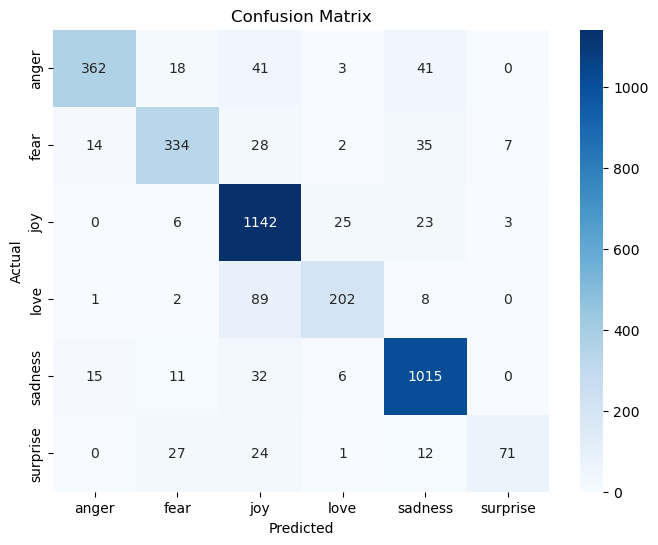

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test_vec)

# Accuracy Score
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Optional: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [9]:
def predict_emotion(text):
    # Vectorize the input
    vec = tfidf.transform([text])
    
    # Predict label
    pred = model.predict(vec)[0]
    
    # Convert numeric label back to emotion
    emotion = le.inverse_transform([pred])[0]
    
    return emotion

# Try it out
sample_text = "I am feeling very low and alone."
print("Input:", sample_text)
print("Predicted Emotion:", predict_emotion(sample_text))


Input: I am feeling very low and alone.
Predicted Emotion: sadness


In [10]:
import joblib

# Save the model and vectorizer
joblib.dump(model, "emotion_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(le, "label_encoder.pkl")  # Saves label mapping

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!
